In [1]:
import pandas as pd
import numpy as np

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (6,4)

print('required libraries has been installed succefully!')

required libraries has been installed succefully!


In [17]:
df=pd.read_csv("_911.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [21]:
#checking for the 1st five rows of dataframe
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Basic Analysis
Let's checkout top 5 townships from which calls received.

In [24]:
df['twp'].value_counts().head()

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

For 600K+ calls, how many unique call titles did we have?

In [26]:
df['title'].nunique()

148

Data Processing

For in depth analysis, We can add some more columns in our dataset by spliting the existing data.

In the title column, there's a kind of 'subcategory' or 'reason for call' alloted to each entry (denoted by the text before the colon)

The timestamp column can be further segregated into Year, Month and Day of Week too.

Let's start with creating a 'Reason' feature for each call.

In [32]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [34]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1,Traffic


In [36]:
df['reason'].value_counts()

reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

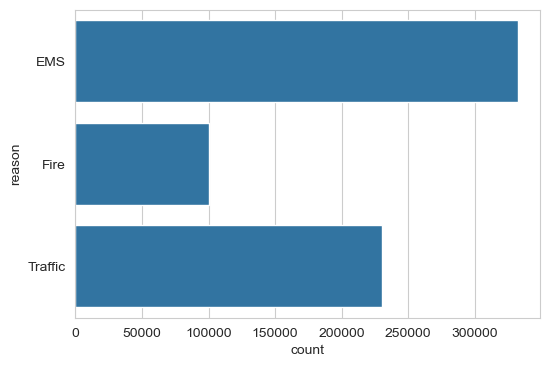

In [72]:
sns.countplot(df['reason'])
plt.show()

In [43]:
type(df['timeStamp'][0])

str

timestamps are string types so if we convert it to a python DateTime object then it'll make our life easier. We can easily extract the year, month, and day information.

In [46]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

For a single DateTime object, we can extract information as follows.

In [49]:
time = df['timeStamp'].iloc[0]

print('Hour:', time.hour)
print('Month:',time.month)
print('Day of week:',time.dayofweek)

Hour: 17
Month: 12
Day of week: 3


Now lets add new columns to extract above information from each row of timestamp.

In [54]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['dayofweek'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [57]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3


The Day of the Week is an integer and it might not be instantly clear which number refers to which Day. We can map that information to a Mon-Sun string.

In [60]:
daymap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [63]:
df['dayofweek'] = df['dayofweek'].map(daymap)

df.tail(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,dayofweek
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,7,Wed
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,7,Wed
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1,Traffic,15,7,Wed


Let's analyze the data by using newly added columns.

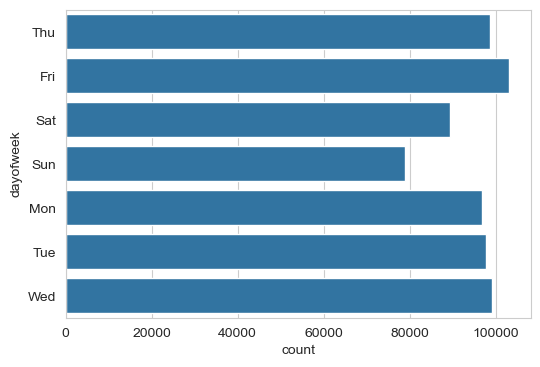

In [70]:
sns.countplot(df['dayofweek'])
plt.show()

The important observation here is that, the number of calls during Weekends is lower as compare with the Weekdays calls.

Let's try to dig deeper into this by analyzing, how many reason wise calls received per day.

In [76]:
sns.countplot(x=df['dayofweek'],hue=df['reason'])
plt.legend(bbox_to_anchor=(1.25,1))

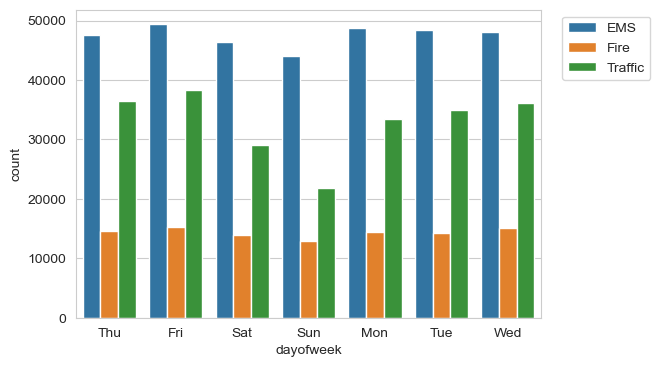

In [78]:
plt.show()

We can see that, the'Traffic' related calls are comparatively less during weekends. This might be the reason that, total calls during weekends are less than weekdays.

Now, let's check out the relationship between the number of calls and the month.

In [80]:
byMonth = df.groupby(by='Month').count()

In [82]:
byMonth['title'].plot.line(y='title')
plt.title('Month Wise Call Count')
plt.ylabel('Number of Calls')

Text(0, 0.5, 'Number of Calls')

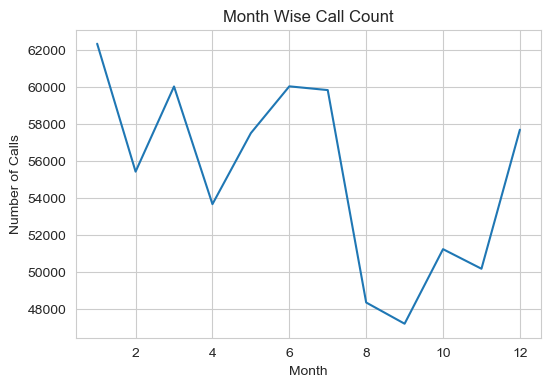

In [84]:
plt.show()

It seem that there are fewer emergency calls during the holiday seasons.

Let's create a heatmap for the counts of calls on each hour, during a given day of the week.

In [86]:
day_hour = df.pivot_table(values='title',index='dayofweek',columns='Hour',aggfunc='count')

day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


Now create a HeatMap using this new DataFrame.

In [89]:
sns.heatmap(day_hour)
plt.tight_layout()

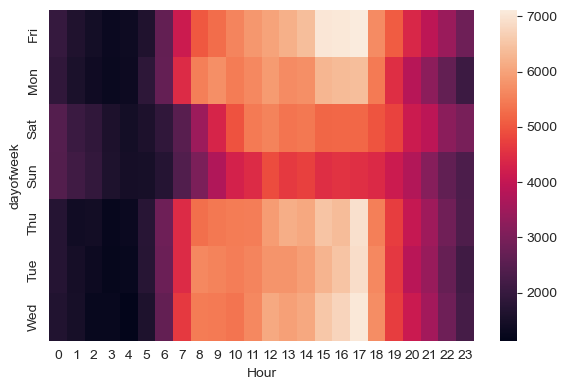

In [91]:
plt.show()